<a name="top"></a>
# Scipy-Stats Juptyer Notebook <img align="right" src="imgs/gmit_logo.jpg">
<br>
Submitted as part of the requirements for the Higher Diploma in Science(Data Analysis) 2020/2021
<br>

*****
*****

## Table of Contents:

- [Section 1: Overview of Scipy Stats Jupyter Notebook](#chapter1)

- [Section 2: Analysis of Variance(Anova](#chapter2)

- [Section 3: Dataset: Diet](#chapter3)
    - [Importing Packages for the Notebook](#chapter3a)
    - [Exploring the Dataset](#chapter3b)
    - [Preprocessing the Data](#chapter3c)

    <br> 
- [Section 4: Hypothesis and Assumption Testing of Dataset to meet Anova Requirements](#chapter4)
    - [Hypothesis of this notebook](#chapter4a)
    - [Hypothesis of this notebook](#chapter4b)
   
    <br> 
    
- [Section 5: Conducting the Anova  and Post Hoc](#chapter5)
    - [Anova and Diet Dataset: f Oneway and Welch](#chapter5a)
    - [Post Hoc Tests: Tukey and Paired Ttests](#chapter5b)
    
    <br> 
    
- [Section 6: Conclusion](#chapter6)

- [References](#ref)

*******

## Overview of Scipy Stats Jupyter Notebook
<a id='chapter1'></a>
##  Section 1: Overview of the scipy-stats package <img align="right" src="imgs/scipy_stats.jpg">

<br>

### What is scipy-stats? 

<br>

***

The scipy-stats module is a sub-package of the SciPy library providing many uses for statistical analysis including probabilistic distributions, random variables and statistical operations *(1)*. It is used to analyse normal distributions and calculate different distribution values with a number of in built methods available such as optimisation, intergration, linear algebra and image processing *(2)*.
<br>
The scipy package in general was originally developed by Travis Oliphant, Pearu Peterson, Eric Jones and James Hunter in 2001. Other packages to be derived from the scipy package include numpy and matplotlib.Within the library, there are functions for both continious and discrete functions that have the ability to work with different types of distributions and performs hypothesis testing and t-tests.*(3)*. The library works seamlessly with other packages to enable statistics calculations, descriptive analysis and data visualisation. These include:
- pandas
<br>
- matplotlib
<br>
- seaborn
<br>
- numpy
<br>

### Key Terms used in this notebook
This notebook will implement an example hypotheses test using ANOVA in which the assumptions underlyng ANOVA are met. Below is a list of key terms and the definition as intended in this notebook *(4)*. 
<br>
<br>
**Types of Variables**
<br>
- **Dependent Variable** The chosen data category that is examined to see if there is any affect from the independent variables
- **Indepedent Variable:** These are the chosen datapoints measured that may have an effect on the dependent variable
<br>
**Measures of of Central Tendency**
<br>
- **Mean**: the average of all the items in the dataset.
- **Median**: the middle element of a sorted dataset.
<br>
**Measures of Variability**
<br>
- **Variance**: the average of the squared differences from the mean 
- **Standard Deviation**: is a measure of how spread out numbers are and is calculated by determining the square root of the variance *(5)* 
<br>

**Quartiles are special percentiles.**

- *The first quartile, Q1, is the same as the 25th percentile. 25% of data will be less than 25th percentile; 75% of data will be more than 25th percentile.*
- *The second quartile, Q2, is the same as the 50th percentile / median.50% of data will be less than 50th percentile; 50% of data will be more than 50th percentile.*
- *The third quartile, Q3, is the same as the 75th percentile.75% of data will be less than 75th percentile; 25% of data will be more than 75th percentile.* *(6)* 

<a id='chapter2'></a>
## Section 2: Analysis of Variance (ANOVA)
***

**Analysis of Variance** can be defined as:
<br>
<br>
*statistical formula used to compare variances across the means of different groups... where a range of scenarios use it to determine if there is any difference between the meands of different group.* *(7)* 
<br>

 
ANOVA due to it's robust procedures helps select the best features when training a dataset, reduces complexity by limiting input variables and can determine if an independent variable is influencing a target variable. 
<br>
<br>
The outcome of the ANOVA is the 'F Statistic' which enables the researcher to conclude wheather or not the null hypothesis was supported or not. This is acheived through calculating the difference between the group variances and within group variances. ANOVA is important is ascertaining whether or not a mean values are statistically significant. ANOVA can also indirectly show if an independent variable is influencing the dependent variable.
<br>
<br>

**Limitations of ANOVA**
<br>
- The test can only be implemented if there is a significant difference between the means of at least two groups but can't identify which pairs differ in its means. This requires ANOVA to be used in tandem with other statistical methods
- Assumes uniform distribution limiting its ability to work with data that does not have a normal distribution and/or may contain outliers
- Assumes Standard Deviation is similiar across the variable to avoid inaccurate conclusions being made
<br>
**Hypothesis Testing**
<br>
- **A Null Hypothesis(HO)** It is inferred there is no difference between the groups or means
<br>
- **An Alternative Hypothesis** It is inferred that there is a difference between groups and means
<br>
**Types of ANOVA**
<br>
 - One Way ANOVA: The one-way ANOVA is suitable with only one independent variable with two or more levels.
 - Two Way ANOVA: When there are two or more independent variables that may have multple levels and includes every possible selection of variables and their levels.
 <br> 

<a id='chapter3'></a>
## Section 3: Diet Dataset

<a id='chapter3a'></a>
### Importing Packages for this notebook

In [176]:
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import statsmodels.api as sn
import numpy as np
import collections as co
import scipy.special as spec
import matplotlib.pyplot as plt

<a id='chapter3b'></a>
### Exploring the Dataset
***

The Diet Dataset contains information on 76 participants who undertook one of 3 diets (A, B, C). At the beginning and end of the trail, the participants weights were taken. The dataset contains information on their gender, allocated diet, height initial weight and their weight after six weeks *(8)*. This analysis will explore whether or not there is any correlation between the diet the participants undertook and the weight each participant lost. 

<a id='chapter3c'></a>
### Preprocessing the Dataset
***

In [177]:
df = pd.read_csv('dietdataset.csv') #first look at the dataset
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [178]:
df.describe()

,Person,Age,Height,pre.weight,Diet,weight6weeks
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,39.500000,39.153846,170.820513,72.525641,2.038462,68.680769
std,22.660538,9.815277,11.276621,8.723344,0.812920,8.924504
min,1.000000,16.000000,141.000000,58.000000,1.000000,53.000000
25%,20.250000,32.250000,164.250000,66.000000,1.000000,61.850000
50%,39.500000,39.000000,169.500000,72.000000,2.000000,68.950000
75%,58.750000,46.750000,174.750000,78.000000,3.000000,73.825000
max,78.000000,60.000000,201.000000,103.000000,3.000000,103.000000


In [179]:
df = pd.read_csv('dietdataset.csv', na_values=' ') # replacing empty cells with Nan
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,NaN,41,171,60,2,60.0
1,26,NaN,32,174,103,2,103.0
2,1,0.0,22,159,58,1,54.2
3,2,0.0,46,192,60,1,54.0
4,3,0.0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1.0,35,183,83,3,80.2
74,75,1.0,49,177,84,3,79.9
75,76,1.0,28,164,85,3,79.7
76,77,1.0,40,167,87,3,77.8


In [180]:
df.rename(columns={'pre.weight': 'initialWeight'}, inplace=True) #changing the name of the pre.weight column
df

,Person,gender,Age,Height,initialWeight,Diet,weight6weeks
0,25,NaN,41,171,60,2,60.0
1,26,NaN,32,174,103,2,103.0
2,1,0.0,22,159,58,1,54.2
3,2,0.0,46,192,60,1,54.0
4,3,0.0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1.0,35,183,83,3,80.2
74,75,1.0,49,177,84,3,79.9
75,76,1.0,28,164,85,3,79.7
76,77,1.0,40,167,87,3,77.8


In [181]:
df['Diet'] = df['Diet'].replace([1,2,3], ['Diet A', 'Diet B', 'Diet C']) #changing the names of the Diet variables 
df

,Person,gender,Age,Height,initialWeight,Diet,weight6weeks
0,25,NaN,41,171,60,Diet B,60.0
1,26,NaN,32,174,103,Diet B,103.0
2,1,0.0,22,159,58,Diet A,54.2
3,2,0.0,46,192,60,Diet A,54.0
4,3,0.0,55,170,64,Diet A,63.3
...,...,...,...,...,...,...,...
73,74,1.0,35,183,83,Diet C,80.2
74,75,1.0,49,177,84,Diet C,79.9
75,76,1.0,28,164,85,Diet C,79.7
76,77,1.0,40,167,87,Diet C,77.8


In [182]:
df['weightloss'] = (df['initialWeight'] - df['weight6weeks']) #creating my dependent variable
df

,Person,gender,Age,Height,initialWeight,Diet,weight6weeks,weightloss
0,25,NaN,41,171,60,Diet B,60.0,0.0
1,26,NaN,32,174,103,Diet B,103.0,0.0
2,1,0.0,22,159,58,Diet A,54.2,3.8
3,2,0.0,46,192,60,Diet A,54.0,6.0
4,3,0.0,55,170,64,Diet A,63.3,0.7
...,...,...,...,...,...,...,...,...
73,74,1.0,35,183,83,Diet C,80.2,2.8
74,75,1.0,49,177,84,Diet C,79.9,4.1
75,76,1.0,28,164,85,Diet C,79.7,5.3
76,77,1.0,40,167,87,Diet C,77.8,9.2


In [183]:
df.isna().sum() # looking into the Nan values

Person           0
gender           2
Age              0
Height           0
initialWeight    0
Diet             0
weight6weeks     0
weightloss       0
dtype: int64

There are two instances where the gender is Nan. It appears that they participants did not fully participate in the trial. Due to the small number of datapoints, these data will be dropped.

In [184]:
df.dropna(axis=0, how='all', subset=['gender'], inplace=True)
df

,Person,gender,Age,Height,initialWeight,Diet,weight6weeks,weightloss
2,1,0.0,22,159,58,Diet A,54.2,3.8
3,2,0.0,46,192,60,Diet A,54.0,6.0
4,3,0.0,55,170,64,Diet A,63.3,0.7
5,4,0.0,33,171,64,Diet A,61.1,2.9
6,5,0.0,50,170,65,Diet A,62.2,2.8
...,...,...,...,...,...,...,...,...
73,74,1.0,35,183,83,Diet C,80.2,2.8
74,75,1.0,49,177,84,Diet C,79.9,4.1
75,76,1.0,28,164,85,Diet C,79.7,5.3
76,77,1.0,40,167,87,Diet C,77.8,9.2


In [185]:
df.groupby("Diet")['weightloss'].describe()

,count,mean,std,min,25%,50%,75%,max
Diet,,,,,,,,
Diet A,24.0,3.300000,2.240148,-0.6,1.975,3.05,3.95,9.0
Diet B,25.0,3.268000,2.464535,-2.1,2.000,3.50,4.70,7.9
Diet C,27.0,5.148148,2.395568,0.5,3.450,5.40,7.00,9.2


In [186]:
df['Diet'].value_counts()

Diet C    27
Diet B    25
Diet A    24
Name: Diet, dtype: int64

['$\\mathdefault{0}$', '$\\mathdefault{1}$']


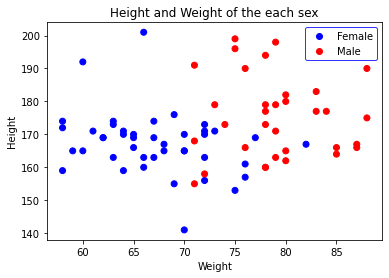

In [187]:
# legend_elements() is a method so we must name our scatter plat scatter...
scatter = plt.scatter(df.initialWeight,df.Height, c=df.gender, cmap="bwr")

# No arguments necessary, default is prop='colors'
handles, labels = scatter.legend_elements()

# Print out labels to see which appears first
print(labels)

# Re-name labels to Gender
labels = ['Female','Male']
leg = plt.legend(handles, labels, frameon=True)
leg.get_frame().set_linewidth(1.0)
leg.get_frame().set_edgecolor('b')
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Height and Weight of the each sex")
plt.show()
# Reference (9)
# https://blog.finxter.com/matplotlib-scatter-plot/

From the above chart, it is inferred from the two clusters that one group has higher instances of height and initial weight. It is well known that males are on average taller and weigh more than their female counterparts. It is assumed that this group is male and the labels will be changed accordingly.

In [188]:
df['gender'] = df['gender'].replace([0,1], ['Female', 'Male']) #changing the names of the Diet variables 
df

,Person,gender,Age,Height,initialWeight,Diet,weight6weeks,weightloss
2,1,Female,22,159,58,Diet A,54.2,3.8
3,2,Female,46,192,60,Diet A,54.0,6.0
4,3,Female,55,170,64,Diet A,63.3,0.7
5,4,Female,33,171,64,Diet A,61.1,2.9
6,5,Female,50,170,65,Diet A,62.2,2.8
...,...,...,...,...,...,...,...,...
73,74,Male,35,183,83,Diet C,80.2,2.8
74,75,Male,49,177,84,Diet C,79.9,4.1
75,76,Male,28,164,85,Diet C,79.7,5.3
76,77,Male,40,167,87,Diet C,77.8,9.2


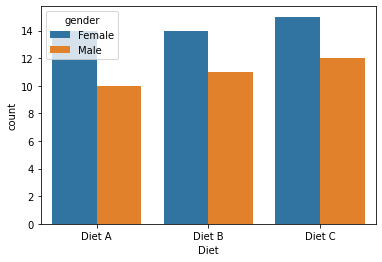

In [189]:
# count plot on single categorical variable
sns.countplot(x ='Diet', hue ='gender', data = df)
 
# Show the plot
plt.show()

In [190]:
df.Diet.describe()

count         76
unique         3
top       Diet C
freq          27
Name: Diet, dtype: object

<a id='chapter4'></a>
## Section 4: Hypothesis and Assumption Testing of Dataset to meet Anova Requirements

<a id='chapter4a'></a>
### Hypothesis of this notebook
The following is the hypothesis drawn from the initial exploratory data analysis:
<br>

**A Null Hypothesis(HO)** The means of all diets are equal with respect to weightloss
<br>

**An Alternative Hypothesis** The mean of at least one diet is different with respect to weightloss


<a id='chapter4b'></a>
### Assumptions within the dataset
***
<br>
There are six assumptions being considered in this notebook that are outlined in the below table *(10),(11),(12),(13)*. 

#### Assumptions
**Your dependent variable should be measured at the interval or ratio level** 
- Dependent variables must be of 'metric measurements'and the values take on any given number within a range  
**Your independent variable should consist of two or more categorical independent groups**
- The categorical groups shouldn't overlap, being part of one group shouldn't affect the chance of being part of another group.
**You should have independence of observation**
- There is no relationship between observations in each group or between the groups themselves. Each time there is a new datapoint in a group it is independent of all other datapoints in that group.
**There should be no significant outliers** 
- It can be difficult to define outlier in the context of the data set.
**Your dependent variable should be approximately normally distributed for each category of the independent**
- When measured, the data points should take the form of a bell shaped curve.
**There needs to be a homogeneity of variances**
- This assumption can be tested using a Levene's test for homogeneity of variances.

#### Assumption 1: Dependent Variable
***

The chosen dependent variable in this instance is the metric weighloss which is measured in kgs. 

In [191]:
#The dependent variable
dependent = df['weightloss']
dependent

2     3.8
3     6.0
4     0.7
5     2.9
6     2.8
     ... 
73    2.8
74    4.1
75    5.3
76    9.2
77    6.1
Name: weightloss, Length: 76, dtype: float64

#### Assumption 2: Independent Variable
***

As we are going to look at two independent variables in this notebook, the author has chosen the following:
<br>
**Diet** - categories are: Diet A, Diet B and Diet C
<br>
**Gender** - catogories are: 0(which = Female) and 1 (which = Male)

In [192]:
#first independent variable
independent = df['Diet']
independent

2     Diet A
3     Diet A
4     Diet A
5     Diet A
6     Diet A
       ...  
73    Diet C
74    Diet C
75    Diet C
76    Diet C
77    Diet C
Name: Diet, Length: 76, dtype: object

#### Assumption 3: Independence of Observation
***

This is a study design issues rather than something that you can test for. For this to be reached the "observations in each group are independent of each other and the observations within groups were obtained by a random sample" *(14)*. There is no standardised test to ensure independence of observation, nonetheless if this assumption is violated, the results obtained from the same could be wrong. Strong, robust and ethical data collection is required *(15)*.

#### Assumption 4: There should be no significant outliers
***

Outliers are unusual values in a dataset which can impact the analysis and distort the findings from research *(16)*. The diet dataset has already been preprocessed to remove any null values. Some casues of outliers can include: data entry errors, sampling errors and natural variations.

<AxesSubplot:xlabel='weightloss', ylabel='Diet'>

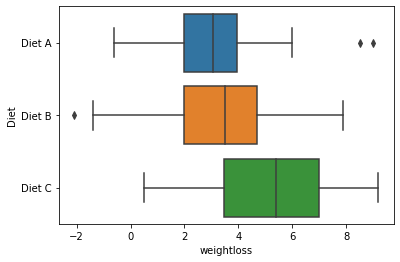

In [193]:
sns.boxplot(x=dependent, y=independent)

#### Assumption 5: Normal Distribution with the Dataset
***

Normal Distribution has two parameters: the mean of the distribution and the standard deviation. The data points are centred around the mean. The higher the standard deviation the flatter the curve will be *(17)*. 

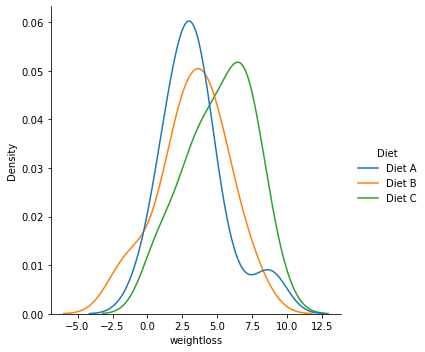

In [194]:
#To explore the normal distribution of each of the Diets in respect to the weightloss category
#KDE of the three categories
sns.displot(x=dependent, hue=independent, kind="kde")

As inferred in the previous assumption, there are outliers in the dataset and they have an negative impact on the data analysis. Above, you can see that Diet A slightly positively skewed distribution where as the other two variables are minimally negatively skewed in their distribution. However, they all appear to have a bell shaped curve *(18)*. 

Since the dataset is small and there are potential outliers, a Shapiro Wilks test will be performed on each of the dependent variables (Diet A, Diet B and Diet C). 
Next, each of the dependent variables will be extracted and a Shapiro Wilks Normality Test to see if the the data accepts or rejects the hypothesis of normality *(19)*. Shapiro was selected because the size of the sample of the dataset is relatively small (*n = 76*) *(20)*. 

In [195]:
#extract the Diet A weight losses
weightloss_dietA = dependent[independent == 'Diet A']
weightloss_dietA.head()

2    3.8
3    6.0
4    0.7
5    2.9
6    2.8
Name: weightloss, dtype: float64

In [196]:
ss.shapiro(weightloss_dietA)

ShapiroResult(statistic=0.9255314469337463, pvalue=0.07748671621084213)

In [197]:
weightloss_dietB = dependent[independent == 'Diet B']
weightloss_dietB.head()

16   -2.1
17    2.0
18    1.7
19    4.3
20    7.0
Name: weightloss, dtype: float64

In [198]:
ss.shapiro(weightloss_dietB)

ShapiroResult(statistic=0.9793620705604553, pvalue=0.8721737861633301)

In [199]:
#extract the Diet C weight losses
weightloss_dietC = dependent[independent == 'Diet C']
weightloss_dietC.head()

30    7.0
31    5.6
32    3.4
33    6.8
34    7.8
Name: weightloss, dtype: float64

In [200]:
ss.shapiro(weightloss_dietC)

ShapiroResult(statistic=0.9601252675056458, pvalue=0.37203603982925415)

In each of the cases, the p > 0.05 which means that the test did not show evidence of non-normality *(21)*. 

#### Assumption 6: There needs to be a homogenity of variances
***

This assumption examines the distribution of spread of values around the means of continous variables. This aims to determine whether or not they are relatively similiar *(22)*. A p value of less than 0.05 idicates a violation of the assumption. "Listwise deletion, logarithmic transformation or non parametric methods" should be considered as a n alternative *(23)*.  
<br>
Barlett's test for homogeneity is also conducted. This focus on determing a *"test-statistic and finding the p value for the test-statistic, given the degrees of freedom and significance level" *(24)* 

In [201]:
#conducting levene's test of homogenity
ss.levene(
    dependent[independent == 'Diet A'],
    dependent[independent == 'Diet B'],
    dependent[independent == 'Diet C'],
)

LeveneResult(statistic=0.46290764582507116, pvalue=0.6312856401117967)

The test shows a p value of higher than 0.05 indicating that there is no evidence of violation of this assumption.

In [202]:
# conducting Bartlett's test
from scipy.stats import bartlett 
#(25) 

# subsetting the data:
DietA = df.query('Diet == "Diet A"')['weightloss']
DietB = df.query('Diet == "Diet B"')['weightloss']
DietC = df.query('Diet == "Diet C"')['weightloss']

# Bartlett's test in Python with SciPy:
stat, p = bartlett(DietA, DietB, DietC)

# Get the results:
print(stat, p)

#to get each individual group
df['Diet'].unique() 

#(26)

0.21811133918795061 0.8966804982694925


array(['Diet A', 'Diet B', 'Diet C'], dtype=object)

The p value is greater thans the significance level, indicating that the null hypothesis should not be rejected and the assumption is met.

<a id='chapter5'></a>
## Section 5: Conducting the Anova Test and Post Hoc Tests

<a id='chapter5a'></a>
### Anova and Diet Dataset: Fisher's One Way and Welch

#### Fisher's One Way Anova

In [203]:
# ANOVA. https://www.statology.org/welchs-anova-in-python/
ss.f_oneway(
    dependent[independent == 'Diet A'],
    dependent[independent == 'Diet B'],
    dependent[independent == 'Diet C']
)

F_onewayResult(statistic=5.383104474859926, pvalue=0.006595853108669741)

The pvalue is under the recommended >0.05 indicating that there is a difference between the means of the groups. 

#### Welch Anova

In [204]:
pip install Pingouin

In [205]:
import pingouin as pg
import pandas as pd
import numpy as np
dv = dependent
#perform Welch's ANOVA # https://www.statology.org/welchs-anova-in-python/
pg.welch_anova(dv ='weightloss', between='Diet', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,Diet,2,48.479892,5.269263,0.008497,0.128527


The overall p value (0.008497) is less than 0.05 so we can reject the null hypothesis that all diets resulted in the same weightloss. In the next section, a range of post hoc tests are implemented to see what variables are impacting this result. 

<a id='chapter5b'></a>
### Post Hoc Tests: Tukey HSD test, GamesHowell and ttests

In [206]:
#using post hoc test to determine the variance indicated in the previous section
# (27)
# (28)
# Import the Tukey HSD test from statsmodels
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# endog is the dependent variable (weightloss).
# groups is the independent variable (Diet).
# alpha is the p-value threshold. In this case anything below 0.05 will reject the null hypothesis.
tukey = pairwise_tukeyhsd(endog=df['weightloss'],
                          groups=df['Diet'],
                          alpha=0.05)

# Print the Tukey table
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Diet A Diet B   -0.032    0.9 -1.6531 1.5891  False
Diet A Diet C   1.8481 0.0188  0.2567 3.4396   True
Diet B Diet C   1.8801 0.0152  0.3057 3.4546   True
---------------------------------------------------


The Tukey test shows us tht the mean is significantly different between Diet C and the Diets A and B, thus the null hypothesis is rejected. Tukey test, while comprehensive can have a wider range of parameters than other Post Hoc test, leading to a great possibility of making a Type 1 Error. 

In [207]:
from pingouin import pairwise_ttests #(29)
posthocs = pairwise_ttests(dv= 'weightloss', between = 'Diet', padjust='bonf', data=df, correction=False)
posthocs

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Diet,Diet A,Diet B,False,True,0.047500,47.0,two-sided,0.962316,1.000000,bonf,0.285,0.013357
1,Diet,Diet A,Diet C,False,True,-2.834783,49.0,two-sided,0.006644,0.019933,bonf,6.658,-0.783040
2,Diet,Diet B,Diet C,False,True,-2.788879,50.0,two-sided,0.007463,0.022388,bonf,6.059,-0.762399


Looking at the p-corr value, anything under 0.5 would be considered significant, indicating that there is a difference in variance between Diet C and Diet A and Diet C and Diet B in terms of weightloss, rejecting the null hypothesis.  

In [208]:
pg.pairwise_gameshowell(dv='weightloss', between='Diet', data=df)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Diet A,Diet B,3.300,3.268000,0.032000,0.672348,0.047594,46.865130,0.900000,0.013383
1,Diet A,Diet C,3.300,5.148148,-1.848148,0.649338,-2.846202,48.862035,0.017411,-0.786194
2,Diet B,Diet C,3.268,5.148148,-1.880148,0.674910,-2.785776,49.435604,0.020280,-0.761551


In this Post Hoc test, the pval is considered and indicates that there is a significant difference between Diet A and Diet C and Diet B and Diet C

<a id='chapter6'></a>
## Conclusion

Using the Diet Dataset and generating a hypothesis after initial data exploration, an hypothesis of the data was formed. In order to accept or reject the hypothesis, an Anova and associated assumption tests were conducted to examine the variance amongst the variables in the data set. The following was concluded:
- Diet C has demonstrated a greater weightloss after 6 weeks than that other two Diets the mean of the weightloss was greater than that of the other two. 

The dataset used demonstrated some key learnings for machine learning
- Ensuring the dataset meets the assumptions can be difficult especially when the dataset may contain outliers. In this notebook, numerous test were used to ensure the assumptions were met due to the nature of the outliers. 
- Data collection is extremely important and should always be considered when first designing your hypothesis. In this dataset,  as the participants for each Diet were different counts, different tests has to be conducted. 
- The importance of conducting post hoc tests was evident in this notebook to really understand the differences between the variables in the dataset. Otherwise, Type 1 errors can be made.  

<a id='ref'></a>
## References

1. https://data-flair.training/blogs/scipy-statistical-functions/
<br>
2. https://www.delftstack.com/api/scipy/scipy-scipy.stats.norm-method/
<br>
3. https://data-flair.training/blogs/scipy-statistical-functions/?ref=morioh.com&utm_source=morioh.com
<br>
4. https://realpython.com/python-statistics/
<br>
5. https://www.mathsisfun.com/data/standard-deviation.html
<br>
6. https://courses.lumenlearning.com/atd-odessa-statistics/chapter/measures-of-the-location-of-the-data/
<br>
7. https://www.tibco.com/reference-center/what-is-analysis-of-variance-anova
<br>
8. https://bioinformatics-core-shared-training.github.io/linear-models-r/anova.html 
<br>
9. https://blog.finxter.com/matplotlib-scatter-plot/
<br>
10. https://www.statology.org/one-way-anova-r/ 
<br>
11. https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-the-factorial-anova/is
<br>
12. https://www.javatpoint.com/anova-test-in-python
<br>
13. https://www.statology.org/anova-assumptions
<br>
14. https://www.statology.org/anova-assumptions/
<br>
15. https://www.statisticshowto.com/assumption-of-independence/
<br>
16. https://statisticsbyjim.com/basics/remove-outliers/
<br>
17. https://www.kaggle.com/gadaadhaarigeek/normal-distribution
<br>
18. https://www.analyticsvidhya.com/blog/2020/04/statistics-data-science-normal-distribution/
<br>
19. https://variation.com/wp-content/distribution_analyzer_help/hs141.htm#:~:text=Shapiro%2DWilks%20Normality%20Test&text=The%20Shapiro%2DWilks%20test%20for,than%20or%20equal%20to%200.05
<br>
20. https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php
<br>
21. https://quantifyinghealth.com/report-shapiro-wilk-test/
<br>
22. https://methods.sagepub.com/reference/encyc-of-research-design/n179.xml
<br>
23. https://www.scalestatistics.com/homogeneity-of-variance.html https://www.statisticssolutions.com/the-assumption-of-homogeneity-of-variance/ 
<br>
24. https://stattrek.com/anova/homogeneity/bartletts-test.aspx
<br>
25. https://www.marsja.se/levenes-bartletts-test-of-equality-homogeneity-of-variance-in-python/
<br>
26. https://stattrek.com/anova/homogeneity/bartletts-test.aspx
<br>
27. https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-4.php
<br>
28. https://www.statology.org/tukey-test-python/
<br>
29. https://www.youtube.com/watch?v=BOGCsSzQNR4
<br>

# End

*******